# Solution to Question 4

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy 
from scipy import spatial
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from networkx import *
import math
from sklearn import *
from numpy import linalg as LA
import sklearn
np.set_printoptions( linewidth=100)

In [2]:
x = scipy.io.loadmat('data.mat') 
print(type(x))
print(x.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X_data'])


*the mat file has been loaded as a dictionary with the keys shown above. So we will look at the information in *
>x\['X_data'\]

In [3]:
print(x['X_data'])
print(type(x['X_data']))
print(np.shape(x['X_data']))

[[-7.81669039e+00  1.16324977e+01  4.98949669e+00 -3.35802043e+00  7.95443168e+00 -5.45619913e+00
   1.13690290e+01 -2.39364323e+00 -4.79876967e+00  6.31191433e+00  4.71334752e+00  1.04514419e+01
  -1.82691692e+00  5.31473317e+00  1.25881541e+01  1.19637910e+01  1.25301569e+01 -1.27692141e+00
  -1.00412048e+01  1.80434342e+00  5.62124181e+00  1.52835395e+00 -1.80430014e+00  1.25621081e+01
  -9.42399715e+00  2.25987849e+00  1.24098641e+01  1.17531320e+01  1.19319953e+01 -3.48526963e+00
  -6.46092868e+00 -4.95370322e+00  1.20692686e+01 -2.60369844e+00 -9.68780485e+00  5.84763181e+00
  -4.71318076e+00 -9.47548630e+00 -9.35594559e+00  1.02876965e+01  5.13304192e+00  5.68433936e+00
   8.31479032e+00 -8.26789061e+00  3.65572685e+00  6.79341745e+00  2.24994002e-01 -1.63300625e+00
  -9.24874242e+00  9.16380271e-01  1.21457463e+01  8.85146342e+00 -7.04864073e+00  8.55150881e+00
  -7.07550792e+00  1.24535939e+01 -8.75770204e+00  3.67911176e+00 -9.32816545e+00  1.02267637e+01
   1.02558613e+01 -8

*the details of the 3D coordinates for the 200 points are seen here as an numpy array with shape 3\*200. Has to be transposed so that rows represent points and columns reprsent the 3 dimensions* 
## Question 4 Part 1 : 
*The first 8 of these points of these will be taken and pairwise distance between them will be shown as an 8\*8 matrix *

In [4]:
first_8 = pd.DataFrame(x['X_data']).transpose() # transposing the dataframe so thatconverting to pandas dataframe for indexing
first_8 = first_8.iloc[0:8][:]
print(np.shape(first_8))
print(first_8) # show the 8 points

(8, 3)
           0         1          2
0  -7.816690 -6.414974  15.517498
1  11.632498 -3.833863  12.962274
2   4.989497 -2.877937  27.819218
3  -3.358020  7.559741  19.880264
4   7.954432 -8.634502  12.826453
5  -5.456199 -8.907795   7.176003
6  11.369029 -4.414476   9.287775
7  -2.393643  7.792662  33.046081


*Pairwise distance will be calculated now*

In [5]:
first_8 = np.array(first_8)
dist_8 = scipy.spatial.distance.squareform(pdist(first_8)) # pairwise distance calculated
print(dist_8)
print("shape of the distance matrix is ",np.shape(dist_8))

[[ 0.         19.78540438 18.10639005 15.30379462 16.15228512  9.02034438 20.27074927 23.20598171]
 [19.78540438  0.         16.30251626 20.05962168  6.0491943  18.74164548  3.729406   27.11582597]
 [18.10639005 16.30251626  0.         15.54519705 16.33131508 23.90845142 19.65893568 13.98901498]
 [15.30379462 20.05962168 15.54519705  0.         20.97573137 20.90407451 21.73634454 13.20314427]
 [16.15228512  6.0491943  16.33131508 20.97573137  0.         14.55497496  6.47999527 28.03154827]
 [ 9.02034438 18.74164548 23.90845142 20.90407451 14.55497496  0.         17.54245704 30.94423111]
 [20.27074927  3.729406   19.65893568 21.73634454  6.47999527 17.54245704  0.         30.04800277]
 [23.20598171 27.11582597 13.98901498 13.20314427 28.03154827 30.94423111 30.04800277  0.        ]]
shape of the distance matrix is  (8, 8)


*The distance matrix is shown above and the dimensions are 8\*8 and a heat map is created for easier visualization. Points are labelled from 0 to 7*

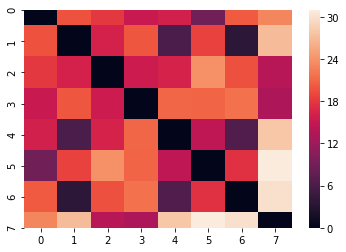

In [6]:
df = pd.DataFrame(dist_8, columns=["0", "1","2","3","4","5", "6", "7"])
p1 = sns.heatmap(df)

## Question 4 Part 1 a and b : 
*Adjacency matrix will be returned for the two cases where if there is an edge between two nodes based on the condition, the value at that position will be the distance between the nodes and 0 if there is no edge between the nodes. Also a networkx graph will be provided to visualize the graph. Note that the distances between the vertices in the plotted graph do not represent the Euclidean distance*

shape of the distance matrix is  (200, 200)
neighbor based graph is


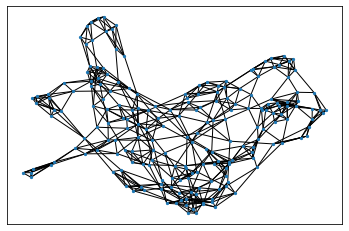

radius based graph is


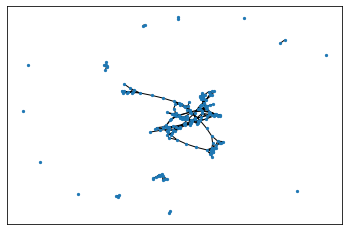

In [7]:
dist = pd.DataFrame(x['X_data']).transpose()
dist = np.array(dist)
dist = scipy.spatial.distance.squareform(pdist(dist)) # pairwise distance calculated and this is our distance matrix


def constructGraph(distance_matrix, nn, radius): # will return two adjacency matrix based on 5 nearest neighbor and radius of 6
    print("shape of the distance matrix is ",np.shape(distance_matrix)) # distance matrix created 
    # print("distance matrix is \n", distance_matrix)
    points = np.shape(distance_matrix)[0] # total number of points 
    adj_1 = np.zeros((points, points)) # nn based adjacency matrix
    adj_2 = np.zeros((points, points)) # radius based adjacency matrix
    


    # adjacency matrix based on nn number of nearest neighbor will be created
    for i in range(points): # for each point
        row_dist = distance_matrix[i,:] # all distances corresponding to the selected point 
        # print("i = ", i, ", row_dist = ", row_dist)
        row_dist = [math.inf if x==0 else x for x in row_dist] # made the 0 distance to be inf so that it doesn't count as one of the nearest neighbors
        row_dist = sorted(row_dist) # pairwise distance sorted
        row_dist_nn = row_dist[0:nn] # required number of nearest neighbors selected
        # print("for i=",i," nearests point are ", row_dist_nn)
        for j in range(points): # for a neighbor of the selected point
            if distance_matrix[i][j] in row_dist_nn: # if the distance between the points was in the nearest neighbor list, means this point was one of the nearest neighbor
                # print("i=",i,"j=",j,",distance_matrix[i][j]", distance_matrix[i][j]," in row_dist_nn ", row_dist_nn)
                adj_1[i][j] = distance_matrix[i][j]
            else: 
                adj_1[i][j] = 0 # no link, networkx needs 0 here for no link 
                
    # adjacency matrix based on the given radius will be created
    for i in range(points):
        for j in range(points):
            if (distance_matrix[i][j] < radius) and (distance_matrix[i][j] > 0): # > 0 to not consider itself
                # print("i=",i,"j=",j, " satisfied distance criteria")
                adj_2[i][j] = distance_matrix[i][j]
            else: 
                adj_2[i][j] = 0 # no link
    
    # print("shape of the adjacency matrices are ",np.shape(adj_1), " and ", np.shape(adj_2)) # distance matrix created 
    return adj_1, adj_2


a, b = constructGraph(dist, 5, 6) # use the fuction created to get the adjacency matrices, dist is 200*200 distance matrix, 5 is nearest neighbor and 6 is radius
G1=nx.from_numpy_matrix(a)
G2=nx.from_numpy_matrix(b)
print("neighbor based graph is")
networkx.draw_networkx(G1, with_labels=False, node_size = 5)
plt.show()
print("radius based graph is")
networkx.draw_networkx(G2, with_labels=False, node_size = 5)
plt.show()

## Solution to Question 4 part 2
*Firstly the distance matrix of the first 8 points will be passed that will return an adjacency matrix. Based in this adjacency matrix, the dijkstra shortest path will be calculated*

In [8]:
def geodesic(distance_matrix):
    a, b = constructGraph(distance_matrix, 5, 6) # the adjacency matrices with 0 for no link and distance as the edge weight will be returned
    points = np.shape(distance_matrix)[0]
    # print("\nnn based adjacency matrix before shortes path for 8 points are \n",a)
    # print("\nradius based adjacency matrix before shortest path for 8 points are \n",b)

    aa = nx.from_numpy_matrix(a) # networkx graph created to use networkx function for dijkstra shortest path
    bb = nx.from_numpy_matrix(b)

    dij_length_nn = dict(nx.all_pairs_dijkstra_path_length(aa)) # returns dijkstra nodewise shortes path
    dij_length_radius = dict(nx.all_pairs_dijkstra_path_length(bb))

    new_points = 8

    cc = np.zeros((new_points,new_points)) # disjkstra lengths for the 8 points based on nn will be added here
    dd = np.zeros((new_points,new_points)) # disjkstra lengths for the 8 points based on radius will be added here

    for i in range(new_points):
        for j in range(new_points):
            cc[i,j] = dij_length_nn[i][j]
            dd[i,j] = dij_length_radius[i][j]
            
    return cc, dd

dijkstra_1,dijkstra_2 = geodesic(dist)
print("\nshortest path distance matrix on 8 points for nn based rule is \n", dijkstra_1)
print("\nshortest path distance matrix on 8 points for radius based rule is \n", dijkstra_2)



shape of the distance matrix is  (200, 200)

shortest path distance matrix on 8 points for nn based rule is 
 [[ 0.         30.7756663  26.31434495 19.13922291 23.73455597  9.86213569 30.48818857 30.48395494]
 [30.7756663   0.         20.60313024 31.40143537  7.04111033 24.37836915  3.729406   39.44265474]
 [26.31434495 20.60313024  0.         20.29839773 19.84401836 34.01706824 24.33253624 18.8395245 ]
 [19.13922291 31.40143537 20.29839773  0.         32.18086941 24.63417284 34.4913636  14.38960312]
 [23.73455597  7.04111033 19.84401836 32.18086941  0.         17.33725882  6.7536326  34.13653919]
 [ 9.86213569 24.37836915 34.01706824 24.63417284 17.33725882  0.         24.09089142 37.83675948]
 [30.48818857  3.729406   24.33253624 34.4913636   6.7536326  24.09089142  0.         40.89017178]
 [30.48395494 39.44265474 18.8395245  14.38960312 34.13653919 37.83675948 40.89017178  0.        ]]

shortest path distance matrix on 8 points for radius based rule is 
 [[ 0.         29.81796934 4

# Solution to question 5

In [9]:
df = pd.read_csv("thick.csv")
df = df.iloc[0:100,:]
df # first 100 rows

,Date.Time,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6
0,2010-02-18 03:04:46,1761,1739,1758,1677,1684,1692
1,2010-02-18 03:37:01,1801,1688,1753,1741,1692,1675
2,2010-02-18 03:37:01,1697,1682,1663,1671,1685,1651
3,2010-02-18 03:37:01,1679,1712,1672,1703,1683,1674
4,2010-02-18 03:37:10,1699,1688,1699,1678,1688,1705
...,...,...,...,...,...,...,...
95,2010-02-18 04:03:39,1717,1708,1645,1690,1568,1688
96,2010-02-18 04:03:39,1661,1660,1668,1691,1678,1692
97,2010-02-18 04:03:48,1706,1665,1696,1671,1631,1640
98,2010-02-18 04:03:48,1689,1678,1677,1788,1720,1735


## Solution to question 5 part 1
*Boxplotting the data in the colums Pos1 to Pos6*

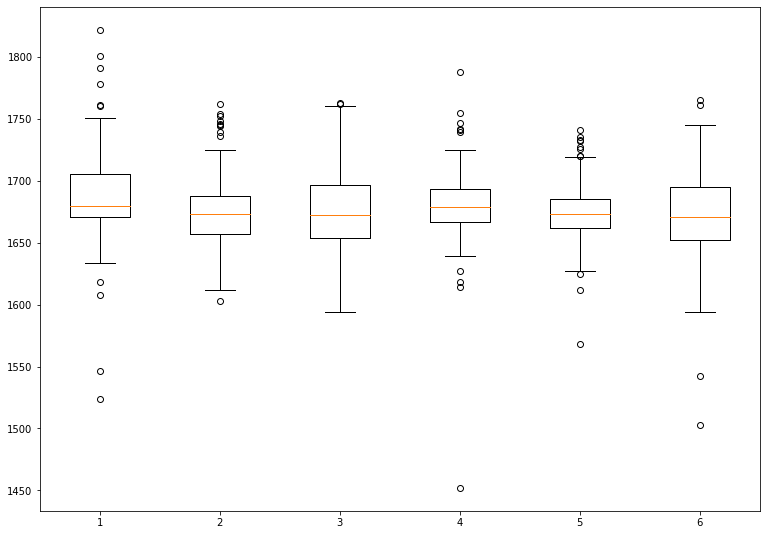

In [10]:
plot_data = np.array(df.iloc[:,1:])
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
# Creating plot 
bp = ax.boxplot(plot_data) 
# boxplot(plot_data)

## Solution to question 5 part 2

*The red center line is the meadian while the outer edges of the box represent the 25th and 75th percentile. 
<br>
<br>
One observation is that the median is not exactly in between the two percentiles - it is closer to the 25th percentile for Pos1, Pos4 and Pos6 while it is is slightly closer to the 75th percentile for Pos2.
<br>
<br>
Asymmetric box-plots mean that the data is skewed. For example for Pos1, the boxplot tells us that the values between the 25th percentile and the median are closer to each other while the values between the median and the 75th percentile are spread apart, which makes the data skewed towards the higher side*

## Solution to question 6 part 1


In [11]:
df = pd.read_csv("food.csv")
print(np.shape(df))

(50, 6)


## Solution to question 6 part 2
*Preprocessing will be done using the preprocessing module of sklearn*

In [12]:
df.head() # old data before preprocessing

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


In [13]:
standardized_df = preprocessing.scale(df.iloc[:,1:])
print("The mean of the 5 features are ", np.mean(standardized_df, axis=0), " which are all very close to 0")
print("The standard deviation of the 5 features are ", np.std(standardized_df, axis = 0))

print("new data after preprocessing \n", standardized_df)

The mean of the 5 features are  [ 1.11466392e-15  7.53841434e-16  2.64233080e-16  1.24344979e-16 -2.04281037e-16]  which are all very close to 0
The standard deviation of the 5 features are  [1. 1. 1. 1. 1.]
new data after preprocessing 
 [[-4.45429679e-01  7.90272081e-01 -8.64753761e-01  3.95480679e-01 -1.01185374e+00]
 [ 3.15988576e-01 -1.60326246e+00  1.41091403e+00 -2.19177610e+00  3.51130771e-01]
 [-6.35784242e-01  1.00609587e-01  2.73080135e-01 -7.13343654e-01  4.80938820e-01]
 [-3.18526636e-01  5.06293407e-01 -8.64753761e-01  1.87391312e+00 -1.07675776e+00]
 [-5.72332721e-01  9.52545608e-01 -2.95836813e-01  9.49892845e-01  4.80938820e-01]
 [ 1.20430987e+00 -5.48484524e-01  8.41997083e-01 -8.98147709e-01  1.97373138e+00]
 [ 7.60149224e-01 -8.73031580e-01  8.41997083e-01 -7.13343654e-01 -4.60169532e-01]
 [ 1.89085533e-01 -7.10758052e-01 -8.64753761e-01  9.49892845e-01 -2.11522215e+00]
 [-9.53041848e-01  7.90272081e-01 -2.95836813e-01  3.95480679e-01 -1.68101423e-01]
 [-5.08881200e

## Solution to question 6 part 3
*The data after preprocessing belong in the same range whereas before each feature had its own range*

## Solution to question 6 part 4
*Correlation formula is given in the pdf submitted along with the notebook. The implementation is given in the next block, and is done on the standardized data*

In [14]:
# implementing with built in functions to verify result with the user defined function in the next block
corr = pd.DataFrame(standardized_df).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4
0,1,-0.750024,0.593086,-0.533739,-0.0960452
1,-0.750024,1,-0.670946,0.572132,0.107937
2,0.593086,-0.670946,1,-0.843965,0.411093
3,-0.533739,0.572132,-0.843965,1,-0.373358
4,-0.0960452,0.107937,0.411093,-0.373358,1


In [15]:
# user defined way to calculate correlation matrix

features = np.shape(standardized_df)[1] # number of features, which is 5 here

correlation_matrix = np.ones((features, features)) # created a matrix of all ones

# now the values of the correlation matrix will be filled in as covariance(feature_1, feature_2)/(STD(feature_1)*STD(feature_2))
for i in range(features):
    for j in range(features):
        if j!=i:
            a = standardized_df[:,i]
            b = standardized_df[:,j]
            covariance = np.cov(a,b)[0][1] # cov() gives a 2*2 matrix where the [0,1] and [1,0] terms are covariance while other terms are variances
            std_a = np.std(a)
            std_b = np.std(b)
            correlation_matrix[i][j] = covariance/(std_a*std_b)

correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4
0,1,-0.765331,0.60519,-0.544632,-0.0980053
1,-0.765331,1,-0.684639,0.583809,0.11014
2,0.60519,-0.684639,1,-0.861189,0.419483
3,-0.544632,0.583809,-0.861189,1,-0.380978
4,-0.0980053,0.11014,0.419483,-0.380978,1


*As it can be seen in the above heat map, the values for the user defined correlation are very close to the built-in function's result*

## Solution to question 6 part 5
*Eigen values and vectors will be calculated using numpy functions *


In [16]:
w, v = LA.eig(correlation_matrix)
print("eigen values are \n", w)
print("eigen vectors are \n", v)


eigen values are 
 [3.0726665  1.30174058 0.29596872 0.22644906 0.10317515]
eigen vectors are 
 [[-0.45753343  0.37043885 -0.6590302   0.46794489 -0.01204121]
 [ 0.4787455  -0.35674997 -0.01623973  0.71846318 -0.35648161]
 [-0.53238767 -0.19766103  0.17888443 -0.13252692 -0.79242064]
 [ 0.50447688  0.22123992 -0.54227938 -0.45693168 -0.44011646]
 [-0.15340262 -0.8046661  -0.48923298 -0.19618432  0.22614798]]


*The 5 eigen vectors are the 5 different columns. To check their orthogonality, we dot product them and see if the values are 0 or close to 0 *

In [17]:
for i in range(np.shape(v)[0]):
    for j in range(np.shape(v)[0]):
        if i!=j and j>i:
            a = v[:,i]
            b = v[:,j]
            print("dot product between ",i," and ",j," eigen vector is ", np.dot(a,b))


dot product between  0  and  1  eigen vector is  -1.1102230246251565e-16
dot product between  0  and  2  eigen vector is  -5.551115123125783e-17
dot product between  0  and  3  eigen vector is  3.608224830031759e-16
dot product between  0  and  4  eigen vector is  -8.326672684688674e-17
dot product between  1  and  2  eigen vector is  1.1102230246251565e-16
dot product between  1  and  3  eigen vector is  0.0
dot product between  1  and  4  eigen vector is  4.163336342344337e-17
dot product between  2  and  3  eigen vector is  9.43689570931383e-16
dot product between  2  and  4  eigen vector is  1.8041124150158794e-16
dot product between  3  and  4  eigen vector is  6.661338147750939e-16


## Solution to question 6 part 6

*The eigen values will be sorted and the new matrix created accordingly. 
<br>
<br>
Then the percent variance captured will be plotted as described in https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=A%20Summary%20of%20the%20PCA%20Approach,-Standardize%20the%20data&text=Sort%20eigenvalues%20in%20descending%20order,from%20the%20selected%20k%20eigenvectors.
where percentage of variance contributed by $i^{th}$ eigen vector is 
<br>
<br>
## $\frac{\lambda_{i}}{\sum_{i}\lambda_i}$ 
where $\lambda_{i}$ is the $i^{th}$ eigen value.


Eigen values are  [3.0726665  1.30174058 0.29596872 0.22644906 0.10317515]  which are already sorted
percentage variance captured looks like  [61.45332994474452, 87.4881414508631, 93.40751577104143, 97.93649702821898, 100.0]


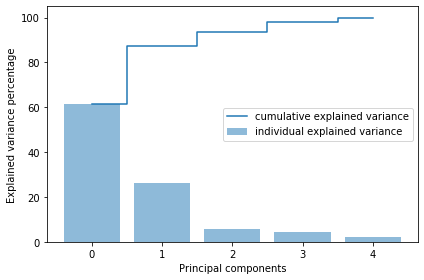

In [18]:
print("Eigen values are ", w, " which are already sorted")
var_ind = [] # individual variance captured
var_cap = []
a = 0
for i in range(len(w)):
    a = a + w[i]
    var_ind.append(w[i]*100.00/np.sum(w))
    var_cap.append(a*100.00/np.sum(w))

plt.bar(range(len(w)), var_ind, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(w)), var_cap, where='mid', label='cumulative explained variance')

print("percentage variance captured looks like ", var_cap)
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

## Solution to question 6 part 7
* It can be seen that with the first 2 eigen vectors, we can capture around 85% of the total variance and with the first 3 vectors, it increases to >90%. So we can go with 3 Eigen Vectors. The plotting will be done for the first 2 eigen vectors and the algorithm used was PCA.


In [19]:
print("Original eigen vectors are \n", v)
v_new = np.column_stack((v[:,0], v[:,1])) # 2 PCs selected 
print("\n")
print("The first 2 eigen vectors are \n", v_new)

Original eigen vectors are 
 [[-0.45753343  0.37043885 -0.6590302   0.46794489 -0.01204121]
 [ 0.4787455  -0.35674997 -0.01623973  0.71846318 -0.35648161]
 [-0.53238767 -0.19766103  0.17888443 -0.13252692 -0.79242064]
 [ 0.50447688  0.22123992 -0.54227938 -0.45693168 -0.44011646]
 [-0.15340262 -0.8046661  -0.48923298 -0.19618432  0.22614798]]


The first 2 eigen vectors are 
 [[-0.45753343  0.37043885]
 [ 0.4787455  -0.35674997]
 [-0.53238767 -0.19766103]
 [ 0.50447688  0.22123992]
 [-0.15340262 -0.8046661 ]]


*The new corrdinates in 2D can be found by the dot product of the original coordinates with the new eigen vectors, which I have selected 2 of the largest ones *

Dimensions of the new corrdinates projected into the two eigen vectors is  (50, 2)


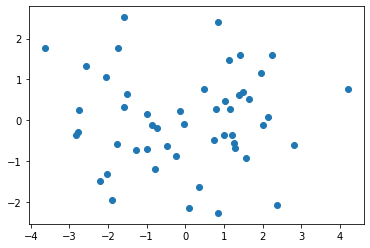

In [20]:
old_data = np.array(standardized_df)
new_data = np.dot(old_data, v_new) # new corrdinates in 2D
print("Dimensions of the new corrdinates projected into the two eigen vectors is ", np.shape(new_data))
p1 = new_data[:,0] # values on the first PC
p2 = new_data[:,1] # values on the seconds PC
plt.scatter(p1, p2)

## Solution to question 6 part 8
*Had some doubts with this question to which the TA replied I could provide the same answer as the scatter plot plotted in the above block as the answer to this*

## Solution to question 6 part 9
*As explained in the lecture, directly going for eigen values and eigen vectors may not be the nest approach. There are alternative and better ways like Singular Value Decomposition that takes into account the effects of both the term and the document.*

## Solution to question 6 part 10
*The technique described is known as Singular Value Decomposition SVD. The implementation using numpy library is below *


In [21]:
A, D, B = np.linalg.svd(old_data) # old data is where the information from the file is stored as an array

*D is returned as a sorted list containing the diagonal elements, so converting it to a matrix with all other values 0*

In [22]:
D_matrix = np.zeros((len(D), len(D)))
for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            D_matrix[i,j] = D[i]


## Solution to question 6 part 11

the old dimensions were  (50, 50) (5, 5) (5, 5)  and the new dimensions are (50, 2) (2, 2) (2, 5)
the scatter plot is 


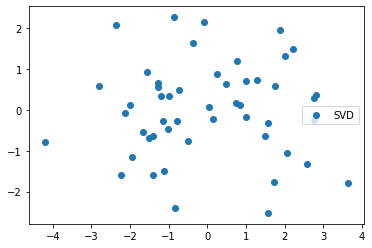

In [23]:
A_new = A[:,0:2]
D_new = D_matrix[0:2, 0:2]
B_new = B[0:2,:]
print("the old dimensions were ", np.shape(A), np.shape(D_matrix), np.shape(B), " and the new dimensions are", np.shape(A_new), np.shape(D_new), np.shape(B_new))
print("the scatter plot is ")
new_data = np.dot(A_new, D_new) # new data based on the reduced space
b1 = new_data[:,0]
b2 = new_data[:,1]
plt.scatter(b1, b2, label = "SVD")
plt.legend(loc='center right')


## Solution to question 6 part 12
*The PCA plot is reproduced below for comparision and the other part is in the pdf.*

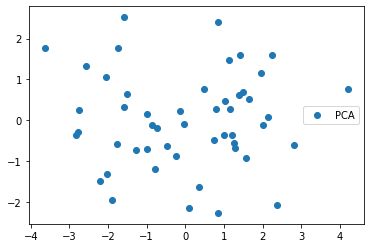

In [24]:
plt.scatter(p1, p2, label = "PCA")
plt.legend(loc='center right')
